<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Machine-Learning/Classification/All-Algorithms/All_Classification_algorithms_on_Advertising_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data

In [45]:
df = pd.read_csv('https://bit.ly/2U2dZq6')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [0]:
X = df.drop(['Gender', 'Purchased'], 1)
y = df.Purchased

In [48]:
X.shape, y.shape

((400, 3), (400,))

In [49]:
X.head(2)

,User ID,Age,EstimatedSalary
0,15624510,19,19000
1,15810944,35,20000


# Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 3), (100, 3), (300,), (100,))

In [52]:
X_train.head(1)

,User ID,Age,EstimatedSalary
250,15810075,44,39000


In [53]:
X_test.head(1)

,User ID,Age,EstimatedSalary
132,15725660,30,87000


In [0]:
trainId = X_train[['User ID']]
testId = X_test[['User ID']]
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [55]:
X_train.head(1)

,Age,EstimatedSalary
250,44,39000


In [56]:
X_test.head(1)

,Age,EstimatedSalary
132,30,87000


# Feature_scaling

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()

In [0]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [62]:
X_train_scaled[:2]

array([[ 0.58164944, -0.88670699],
       [-0.60673761,  1.46173768]])

In [63]:
X_test_scaled[:2]

array([[-0.80480212,  0.50496393],
       [-0.01254409, -0.5677824 ]])

# Train Model

## functions we are using for all models

In [0]:
def model_fit(X_train, X_test, model):
  model.fit(X_train, y_train)
  print(F' Train score is {model.score(X_train, y_train)}')
  print('\n')
  print(f'Test score is {model.score(X_test, y_test)}')
  print('\n\n')
  y_pred = model.predict(X_test)
  print(f'Train confusion matrix is \n {confusion_matrix(y_train, model.predict(X_train))}\n')
  print(f'Test confusion matrix is \n {confusion_matrix(y_test, y_pred)}')
  print('\n\n')
  print(f'classification report is \n {classification_report(y_test, y_pred)}')
  return model

In [0]:
def graph(X_train, X_test, classifier):
  # Visualising the Training set results
  import matplotlib.pyplot as plt
  %matplotlib inline
  import numpy as np
  from matplotlib.colors import ListedColormap
  X_set, y_set = X_train, y_train
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
      plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                  c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title('Classifier (Training set)')
  plt.xlabel('Age')
  plt.ylabel('Estimated Salary')
  plt.legend()
  plt.show()

  # Visualising the Test set results
  from matplotlib.colors import ListedColormap
  X_set, y_set = X_test, y_test
  X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
  plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  plt.xlim(X1.min(), X1.max())
  plt.ylim(X2.min(), X2.max())
  for i, j in enumerate(np.unique(y_set)):
      plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                  c = ListedColormap(('red', 'green'))(i), label = j)
  plt.title('Classifier (Test set)')
  plt.xlabel('Age')
  plt.ylabel('Estimated Salary')
  plt.legend(loc='right')
  plt.show()

## 1.1 LogisticRegression

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
model = LogisticRegression(random_state = 0)
model = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 0.8233333333333334


Test score is 0.89



Train confusion matrix is 
 [[172  17]
 [ 36  75]]

Test confusion matrix is 
 [[65  3]
 [ 8 24]]



classification report is 
              precision    recall  f1-score   support

          0       0.89      0.96      0.92        68
          1       0.89      0.75      0.81        32

avg / total       0.89      0.89      0.89       100



In [0]:
y_proba = model.predict_proba(X_test_scaled)

In [68]:
y_proba[:2]

array([[0.8835313 , 0.1164687 ],
       [0.82871699, 0.17128301]])

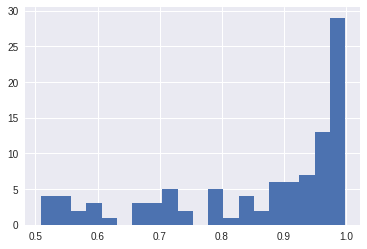

In [70]:
y_max_proba = [max(i) for i in y_proba]
plt.hist(y_max_proba, bins = 20)
plt.show()

### Visualisation

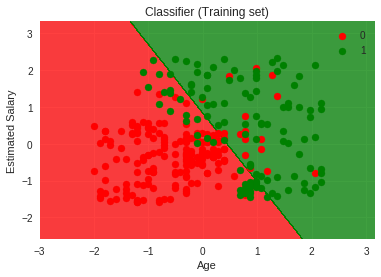

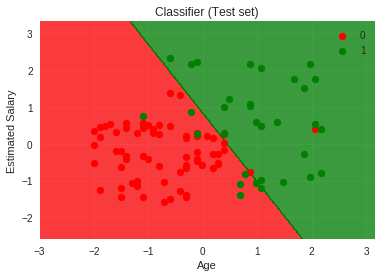

In [72]:
graph(X_train_scaled, X_test_scaled, model)

### 1.2 LogisticRegression with PolynomialFeatures

In [166]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report
poly = PolynomialFeatures(6)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.fit_transform(X_test_scaled)
lrmodel = LogisticRegression()
model = model_fit(X_train_poly, X_test_poly, lrmodel)

 Train score is 0.8966666666666666


Test score is 0.92



Train confusion matrix is 
 [[175  14]
 [ 17  94]]

Test confusion matrix is 
 [[64  4]
 [ 4 28]]



classification report is 
              precision    recall  f1-score   support

          0       0.94      0.94      0.94        68
          1       0.88      0.88      0.88        32

avg / total       0.92      0.92      0.92       100



In [169]:
model.coef_.shape

(1, 28)

#### probability of y_test

In [0]:
y_test_proba = lrmodel.predict_proba(X_test_poly)

In [0]:
y_test_proba[:2]

array([[0.9201132 , 0.0798868 ],
       [0.94888294, 0.05111706]])

In [0]:
y_max_proba = [np.max(i) for i in y_test_proba]
y_max_proba[:2]

[0.9201131984533866, 0.9488829439074131]

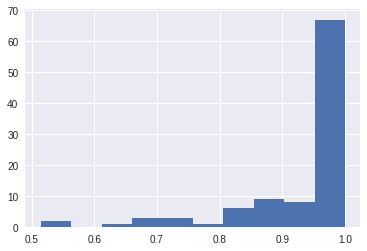

In [0]:
plt.hist(y_max_proba)
plt.show()

### graph

## 2. KNN

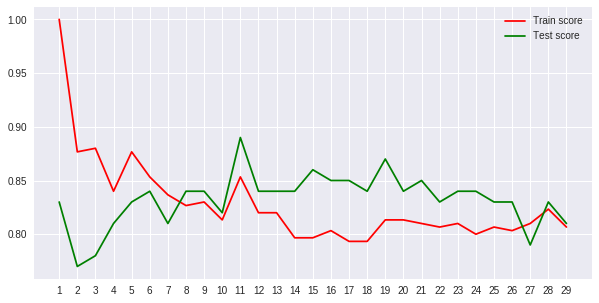

In [178]:
x = range(1,30)
t = []
s = []
for i in x:
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train, y_train)
  s.append(model.score(X_test, y_test))
  t.append(model.score(X_train, y_train))
  
plt.figure(figsize =(10, 5))
plt.plot(x, t, c = 'r', label = 'Train score')
plt.plot(x, s, c = 'g', label = 'Test score')
plt.xticks(x)          
plt.legend()    
plt.grid()
plt.grid()

### After Scaling the Features

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()

In [0]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

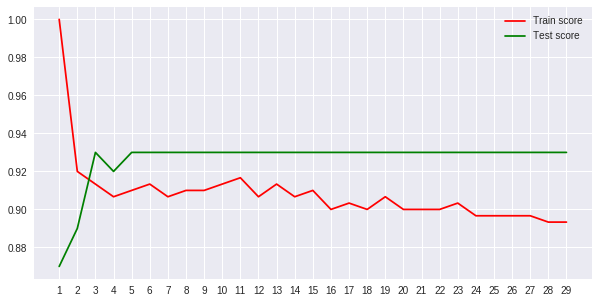

In [179]:
x = range(1,30)
t = []
s = []
for i in x:
  model = KNeighborsClassifier(n_neighbors = i)
  model.fit(X_train_scaled, y_train)
  s.append(model.score(X_test_scaled, y_test))
  t.append(model.score(X_train_scaled, y_train))
  
plt.figure(figsize =(10, 5))
plt.plot(x, t, c = 'r', label = 'Train score')
plt.plot(x, s, c = 'g', label = 'Test score')
plt.xticks(x)          
plt.grid()
plt.legend()    
plt.grid()

### n_neighbors = 3

In [175]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train_scaled, y_train)
modele = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 0.9133333333333333


Test score is 0.93



Train confusion matrix is 
 [[174  15]
 [ 11 100]]

Test confusion matrix is 
 [[64  4]
 [ 3 29]]



classification report is 
              precision    recall  f1-score   support

          0       0.96      0.94      0.95        68
          1       0.88      0.91      0.89        32

avg / total       0.93      0.93      0.93       100



### n_neighbors = 11

In [180]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
model = KNeighborsClassifier(n_neighbors = 11)
model = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 0.9166666666666666


Test score is 0.93



Train confusion matrix is 
 [[172  17]
 [  8 103]]

Test confusion matrix is 
 [[64  4]
 [ 3 29]]



classification report is 
              precision    recall  f1-score   support

          0       0.96      0.94      0.95        68
          1       0.88      0.91      0.89        32

avg / total       0.93      0.93      0.93       100



### Visualisation

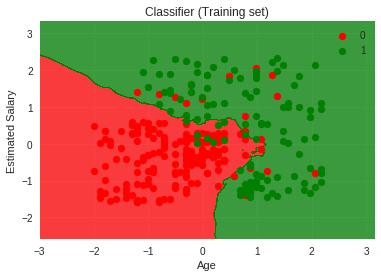

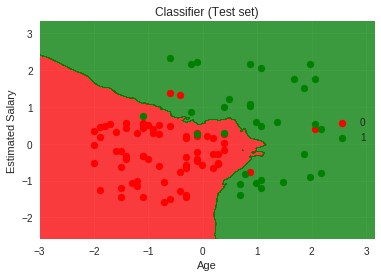

In [181]:
graph(X_train_scaled, X_test_scaled, model)

## 3. SVC

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

### 3.1 Linear SVC

In [170]:
model = SVC(kernel = 'linear')
model.fit(X_train_scaled, y_train)
model = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 0.8233333333333334


Test score is 0.9



Train confusion matrix is 
 [[173  16]
 [ 37  74]]

Test confusion matrix is 
 [[66  2]
 [ 8 24]]



classification report is 
              precision    recall  f1-score   support

          0       0.89      0.97      0.93        68
          1       0.92      0.75      0.83        32

avg / total       0.90      0.90      0.90       100



### Visualisation

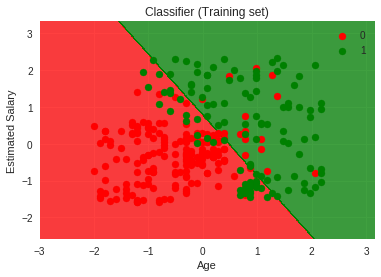

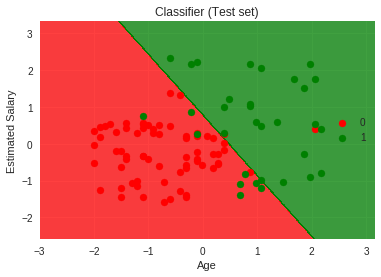

In [86]:
graph(X_train_scaled, X_test_scaled, model)

### 3.2 rbf SVC

In [172]:
model = SVC(kernel = 'rbf')
model.fit(X_train_scaled, y_train)
modele = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 0.9133333333333333


Test score is 0.93



Train confusion matrix is 
 [[171  18]
 [  8 103]]

Test confusion matrix is 
 [[64  4]
 [ 3 29]]



classification report is 
              precision    recall  f1-score   support

          0       0.96      0.94      0.95        68
          1       0.88      0.91      0.89        32

avg / total       0.93      0.93      0.93       100



### Visualisation

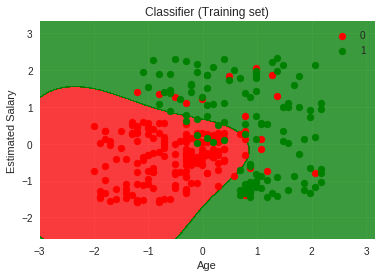

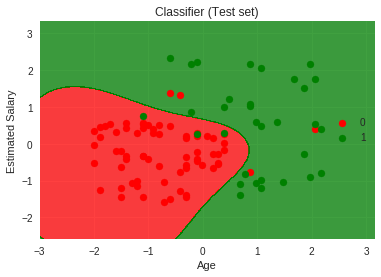

In [88]:
graph(X_train_scaled, X_test_scaled, model)

### 3.3 GridSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV

class sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

In [91]:
param_grid = {'C':np.linspace(0.1, 3, 20), 'kernel': ['linear', 'rbf', 'poly'], 'gamma': np.linspace(0.1, 3, 20)}
grid = GridSearchCV(SVC(), param_grid = param_grid, cv = 3, scoring = 'accuracy',verbose = 1)
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:   20.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([0.1    , 0.25263, 0.40526, 0.55789, 0.71053, 0.86316, 1.01579,
       1.16842, 1.32105, 1.47368, 1.62632, 1.77895, 1.93158, 2.08421,
       2.23684, 2.38947, 2.54211, 2.69474, 2.84737, 3.     ]), 'kernel': ['linear', 'rbf', 'poly'], 'gamma': array([0.1    , 0.25263, 0.40526, 0.55789, 0.71053, 0.86316, 1.01579,
       1.16842, 1.32105, 1.47368, 1.62632, 1.77895, 1.93158, 2.08421,
       2.23684, 2.38947, 2.54211, 2.69474, 2.84737, 3.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [92]:
grid.best_params_

{'C': 2.694736842105263, 'gamma': 0.8631578947368421, 'kernel': 'rbf'}

In [93]:
grid.best_score_

0.9166666666666666

In [173]:
model = grid.best_estimator_
model

SVC(C=2.694736842105263, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.8631578947368421,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [174]:
modele = model_fit(X_train_scaled, X_test_scaled, model)

 Train score is 0.9133333333333333


Test score is 0.93



Train confusion matrix is 
 [[171  18]
 [  8 103]]

Test confusion matrix is 
 [[64  4]
 [ 3 29]]



classification report is 
              precision    recall  f1-score   support

          0       0.96      0.94      0.95        68
          1       0.88      0.91      0.89        32

avg / total       0.93      0.93      0.93       100



## 4. DecisionTreeClassifier